# Nanopore data

In [46]:
import pandas as pd

data = pd.read_csv("data_values.tsv", sep="\t")

In [47]:
import numpy as np

for read_name, group in data.groupby("read_name"):
    filename = f"data_{read_name}.tsv"
    group.to_csv(filename, sep="\t", index=False)

In [48]:
import matplotlib.pyplot as plt

### 1. af de 10 RNA'er

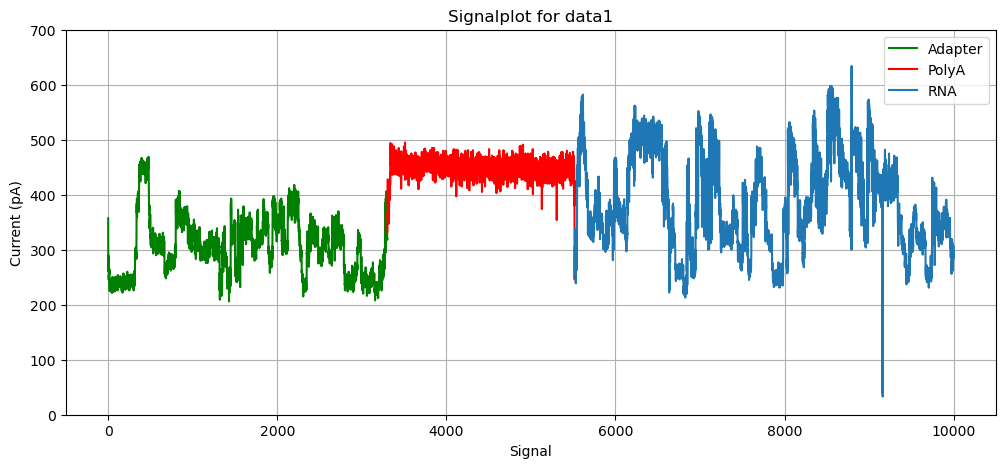

In [49]:
data1 = pd.read_csv("data_0c0eb88d-99d6-4c08-810c-a1838f024686.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data1["signal"] = data1["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data1_subset = data1["signal"][0][:10000]

# ployA start og slut
polya_start_data1 = int(data1["polya_start"][0])
polya_end_data1 = int(data1["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data1_adapter = data1_subset[:polya_start_data1]  # Før polyA-start
data1_polya = data1_subset[polya_start_data1:polya_end_data1]  # PolyA-regionen
data1_rna = data1_subset[polya_end_data1:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data1_adapter)), data1_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data1_adapter), len(data1_adapter) + len(data1_polya)), data1_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data1_adapter) + len(data1_polya), len(data1_subset)), data1_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data1")
plt.legend()
plt.grid()
plt.show()

### 2. af de 10 RNA'er

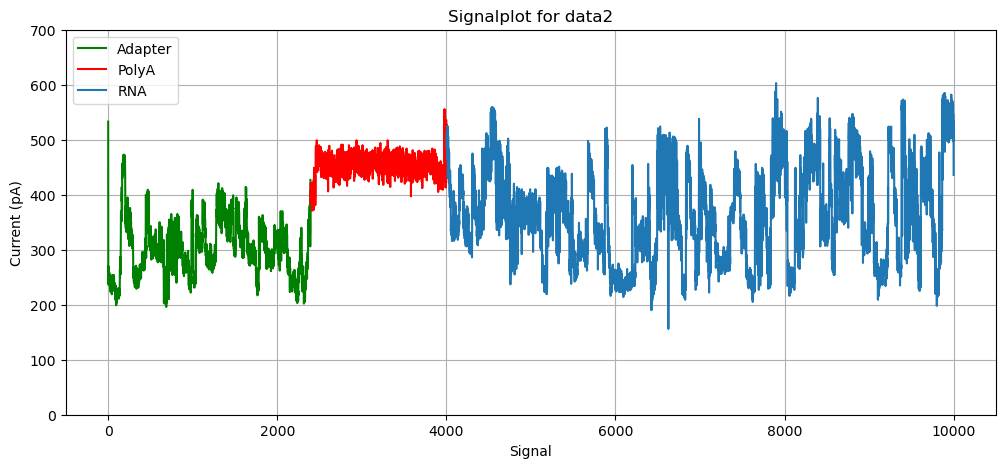

In [50]:
data2 = pd.read_csv("data_1a348429-e88d-42bc-83d9-c40709f2282a.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data2["signal"] = data2["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data2_subset = data2["signal"][0][:10000]

# ployA start og slut
polya_start_data2 = int(data2["polya_start"][0])
polya_end_data2 = int(data2["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data2_adapter = data2_subset[:polya_start_data2]  # Før polyA-start
data2_polya = data2_subset[polya_start_data2:polya_end_data2]  # PolyA-regionen
data2_rna = data2_subset[polya_end_data2:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data2_adapter)), data2_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data2_adapter), len(data2_adapter) + len(data2_polya)), data2_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data2_adapter) + len(data2_polya), len(data2_subset)), data2_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data2")
plt.legend()
plt.grid()
plt.show()

### Adapteren af første og andet RNA sammen

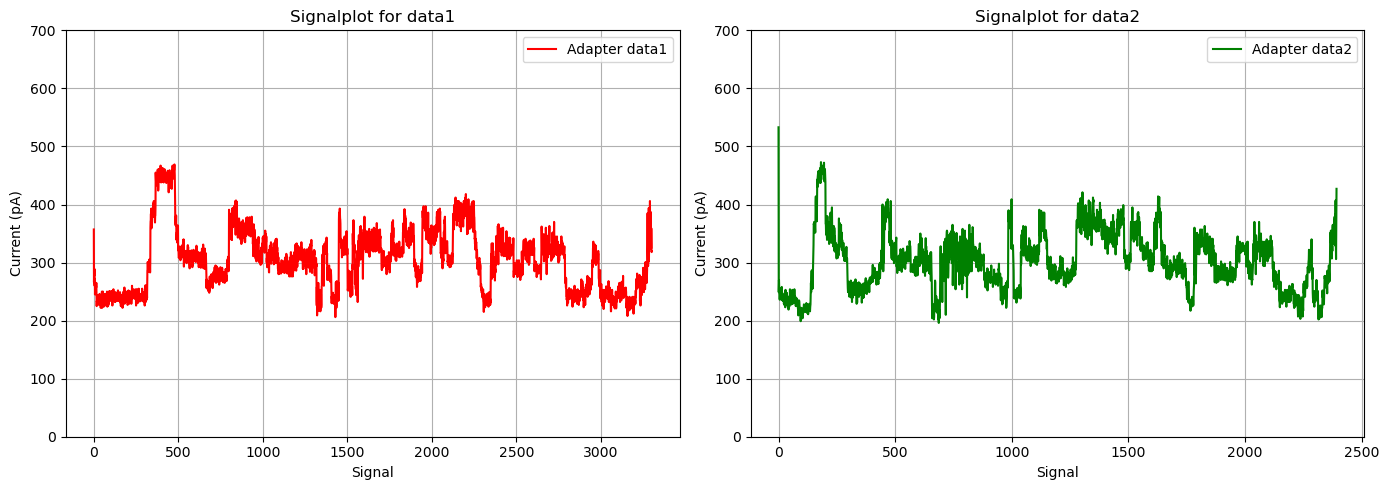

In [51]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# Plot for data1 on the left
axes[0].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Adapter data1")
axes[0].set_ylim(0, 700)
axes[0].set_xlabel("Signal")
axes[0].set_ylabel("Current (pA)")
axes[0].set_title("Signalplot for data1")
axes[0].legend()
axes[0].grid()

# Plot for data2 on the right
axes[1].plot(range(len(data2_adapter)), data2_adapter, color="green", label="Adapter data2")
axes[1].set_ylim(0, 700)
axes[1].set_xlabel("Signal")
axes[1].set_ylabel("Current (pA)")
axes[1].set_title("Signalplot for data2")
axes[1].legend()
axes[1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

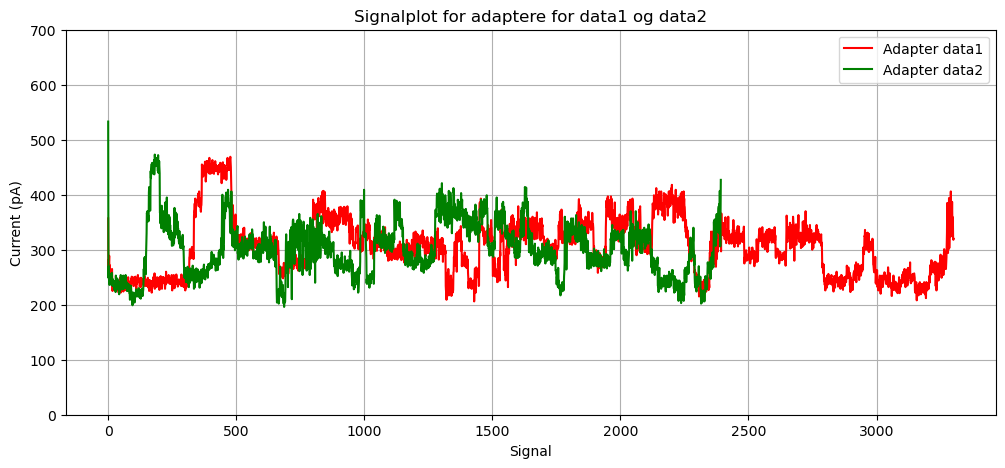

In [52]:
plt.figure(figsize=(12, 5))

plt.plot(range(len(data1_adapter)), data1_adapter, color="red", label="Adapter data1")

plt.plot(range(len(data2_adapter)), data2_adapter, color="green", label="Adapter data2")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for adaptere for data1 og data2")
plt.legend()
plt.grid()
plt.show()

##### Strække den ene graf til at passe den anden

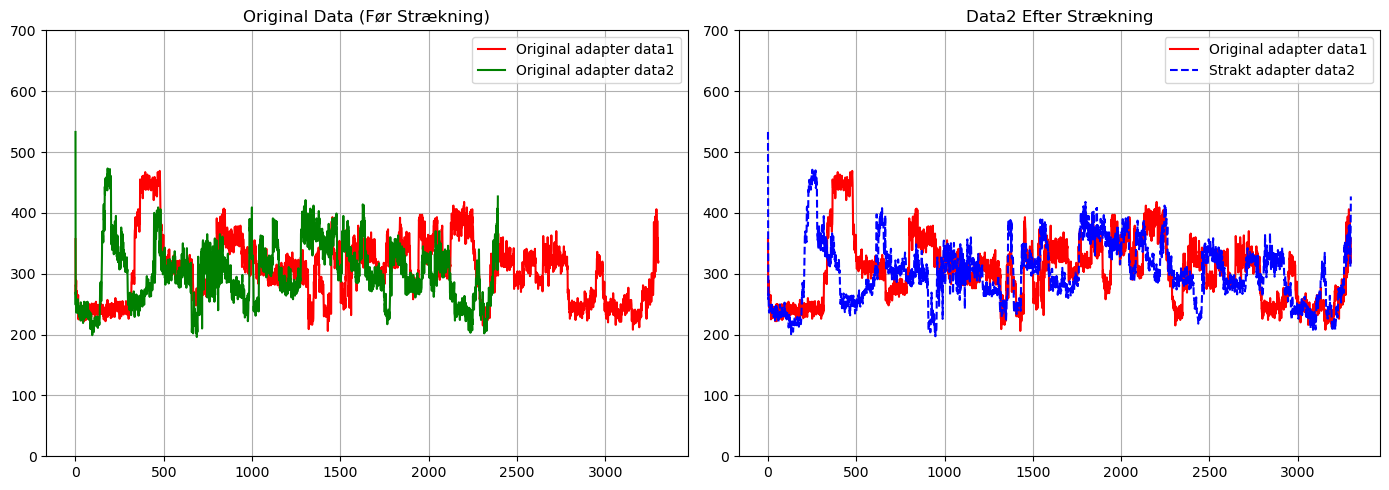

In [53]:
# Definér en skaleringsprocent (f.eks. 50% for at gøre signalet 1.5x længere)
scale_factor = len(data1_adapter) / len(data2_adapter) 

# Oprindelige længder
ny_len_data2_adapter = int(len(data2_adapter) * scale_factor)  # Ny længde efter skalering

# Skab nye x-akse punkter til interpolation
x_original_data2_adapter = np.linspace(0, 1, len(data2_adapter))
x_ny_data2_adapter = np.linspace(0, 1, ny_len_data2_adapter)

# Interpolér dataene til den nye længde
data2_adapter_stretched = np.interp(x_ny_data2_adapter, x_original_data2_adapter, data2_adapter)

# Plot original vs. strakt signal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Før strækning
axes[0].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[0].plot(range(len(data2_adapter)), data2_adapter, color="green", label="Original adapter data2")
axes[0].set_title("Original Data (Før Strækning)")
axes[0].set_ylim(0, 700)
axes[0].legend()
axes[0].grid()

# Før strækning
axes[1].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[1].plot(data2_adapter_stretched, color="blue", linestyle="dashed", label="Strakt adapter data2")
axes[1].set_title("Data2 Efter Strækning")
axes[1].set_ylim(0, 700)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

##### Forskydning af graf

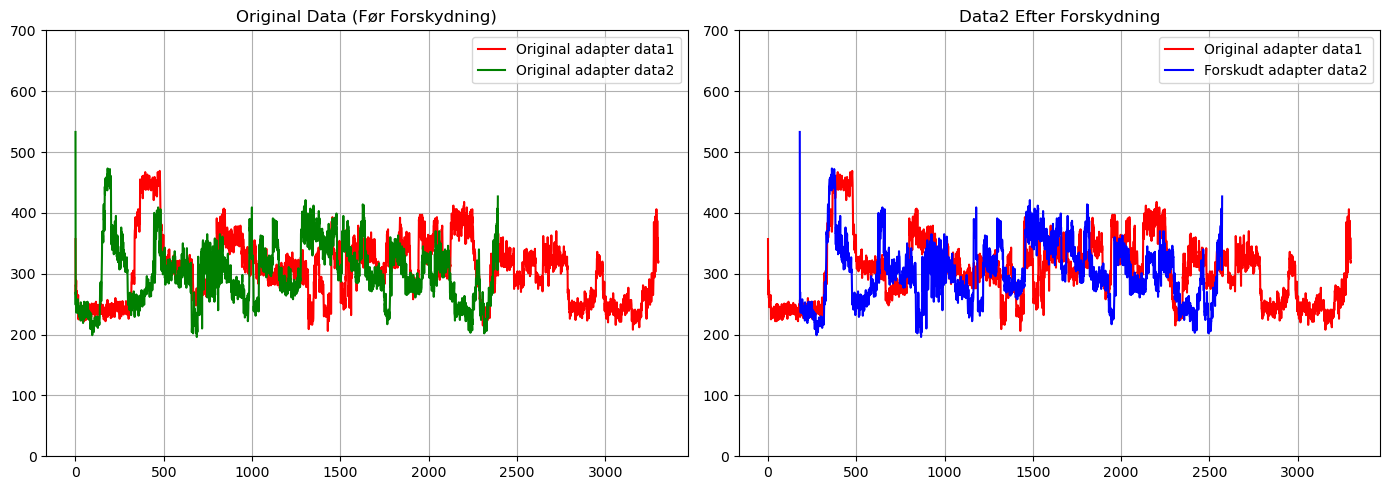

In [54]:
# Skub signalet til højre
x_shift = 180
shifted_x = np.arange(len(data2_adapter)) + x_shift  # Opret x-akse med forskydning

# Plot original vs. forskudt signal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Før forskydning
axes[0].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[0].plot(range(len(data2_adapter)), data2_adapter, color="green", label="Original adapter data2")
axes[0].set_title("Original Data (Før Forskydning)")
axes[0].set_ylim(0, 700)
axes[0].legend()
axes[0].grid()

# Efter forskydning
axes[1].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[1].plot(shifted_x, data2_adapter, color="blue", label="Forskudt adapter data2")  # Brug forskudt x
axes[1].set_title("Data2 Efter Forskydning")
axes[1].set_ylim(0, 700)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

##### Kombineret forskudning og strækning

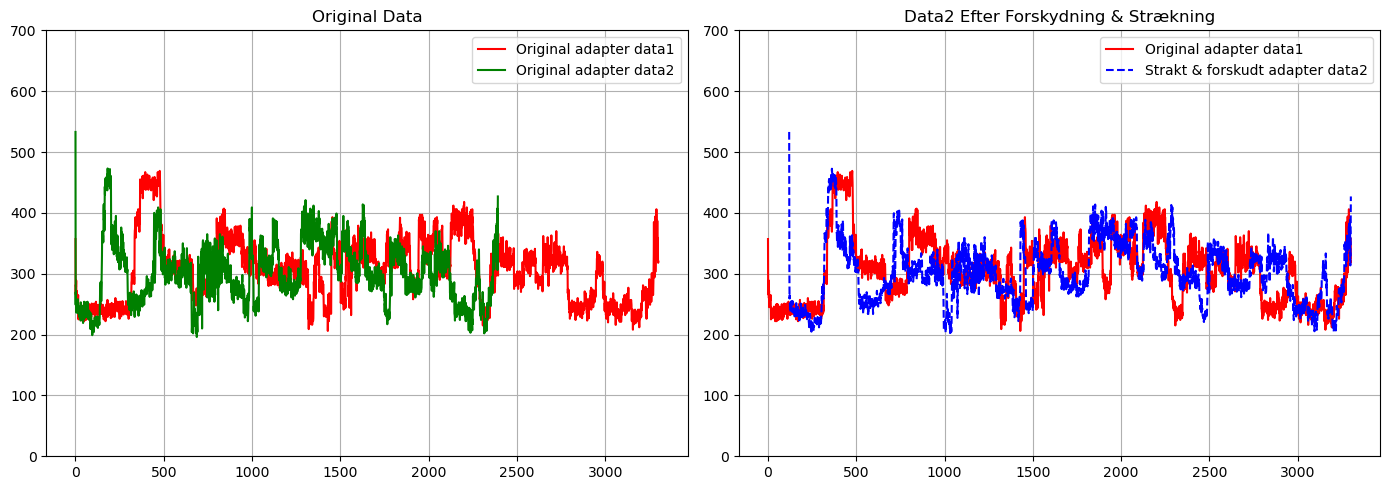

In [55]:
# Skub signalet til højre
x_shift = 120
shifted_x = np.arange(len(data2_adapter)) + x_shift  # Opret x-akse med forskydning

# Definér en skaleringsprocent for at matche længder
scale_factor = (len(data1_adapter) - x_shift) / len(data2_adapter)
ny_len_data2_adapter = int(len(data2_adapter) * scale_factor)  # Ny længde efter skalering

# Skab nye x-akse punkter til interpolation
x_original_data2_adapter = np.linspace(0, 1, len(data2_adapter))  # Oprindelige x-akse
x_ny_data2_adapter = np.linspace(0, 1, ny_len_data2_adapter)  # Ny skaleret x-akse

# Interpolér dataene til den nye længde
data2_adapter_stretched = np.interp(x_ny_data2_adapter, x_original_data2_adapter, data2_adapter)

# Justér x-aksen efter forskydning
shifted_x_stretched = np.arange(ny_len_data2_adapter) + x_shift  # Skubbet x-akse for det strakte signal

# Opret figurer
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Før skubning
axes[0].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[0].plot(range(len(data2_adapter)), data2_adapter, color="green", label="Original adapter data2")
axes[0].set_title("Original Data")
axes[0].set_ylim(0, 700)
axes[0].legend()
axes[0].grid()

# Efter både skubning og strækning
axes[1].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[1].plot(shifted_x_stretched, data2_adapter_stretched, color="blue", linestyle="dashed", label="Strakt & forskudt adapter data2")
axes[1].set_title("Data2 Efter Forskydning & Strækning")
axes[1].set_ylim(0, 700)
axes[1].legend()
axes[1].grid()

# Justér layout
plt.tight_layout()
plt.show()

##### Samme slut punkt

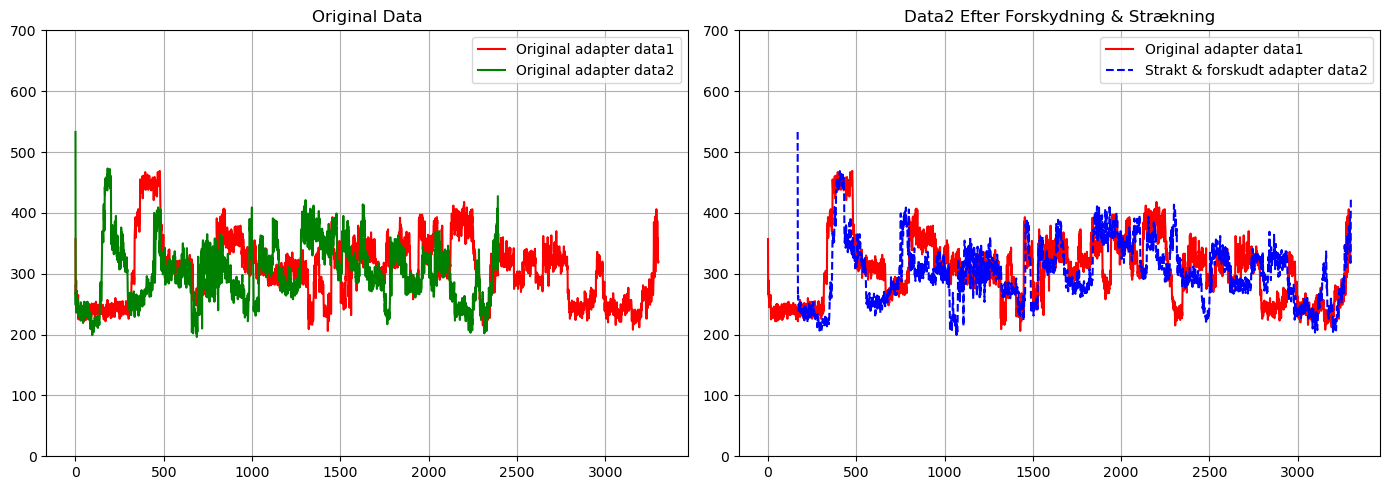

In [56]:
# Strækningen
scale_factor = 1.31  # Ændr denne for at kontrollere strækningen

# Skub signalet til højre
x_shift = len(data1_adapter) - len(data2_adapter)  
shifted_x = np.arange(len(data2_adapter)) + x_shift  

# Skab nye x-akse punkter til interpolation
ny_len_data2_adapter = int(len(data2_adapter) * scale_factor)
x_original_data2_adapter = np.linspace(0, 1, len(data2_adapter))  
x_ny_data2_adapter = np.linspace(0, 1, ny_len_data2_adapter)  

# Interpolér dataene til den nye længde
data2_adapter_stretched = np.interp(x_ny_data2_adapter, x_original_data2_adapter, data2_adapter)

# Justér forskydning, så slutpunkterne er ens
slutpunkt_data1 = len(data1_adapter)  
slutpunkt_data2 = x_shift + ny_len_data2_adapter  
x_offset = slutpunkt_data1 - slutpunkt_data2  

# Skab ny x-akse med forskydning, så slutpunktet matcher
shifted_x_stretched = np.linspace(x_shift + x_offset, slutpunkt_data1, ny_len_data2_adapter)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Før forskydning
axes[0].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[0].plot(range(len(data2_adapter)), data2_adapter, color="green", label="Original adapter data2")
axes[0].set_title("Original Data")
axes[0].set_ylim(0, 700)
axes[0].legend()
axes[0].grid()

# Efter både skubning og strækning
axes[1].plot(range(len(data1_adapter)), data1_adapter, color="red", label="Original adapter data1")
axes[1].plot(shifted_x_stretched, data2_adapter_stretched, color="blue", linestyle="dashed", label="Strakt & forskudt adapter data2")
axes[1].set_title("Data2 Efter Forskydning & Strækning")
axes[1].set_ylim(0, 700)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

##### Kun starten af graferne

469
469


473
473


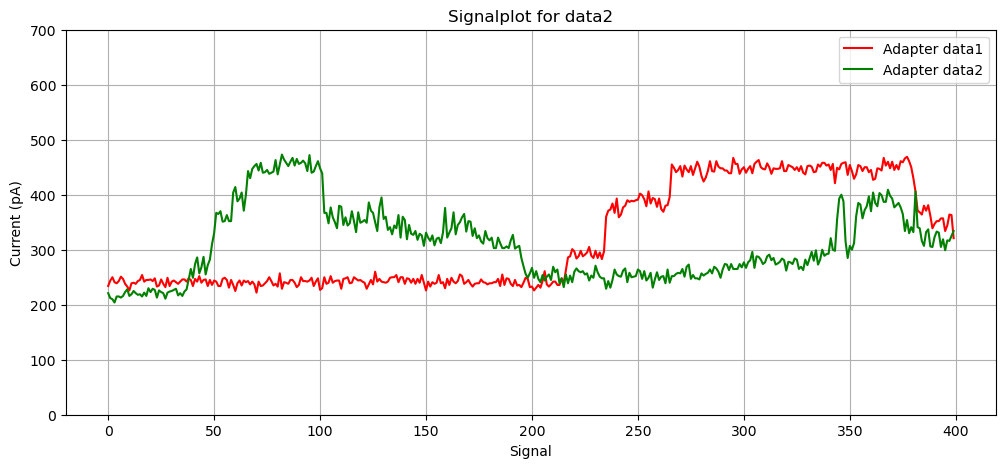

In [57]:
data_test1 = data1_adapter[100:500]
data_test2 = data2_adapter[100:500]

print(max(data_test1))
print(data_test1[377])

print("\n")

print(max(data_test2))
print(data_test2[82])

plt.figure(figsize=(12, 5))

plt.plot(range(len(data_test1)), data_test1, color="red", label="Adapter data1")

plt.plot(range(len(data_test2)), data_test2, color="green", label="Adapter data2")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data2")
plt.legend()
plt.grid()
plt.show()

Maks for de to adaptere er ikke det samme..
Det betyder nok, at værdierne aldrig rammer de samme, da målingerne er målt på forskellige tidspunkter

### 3. af de 10 RNA'er

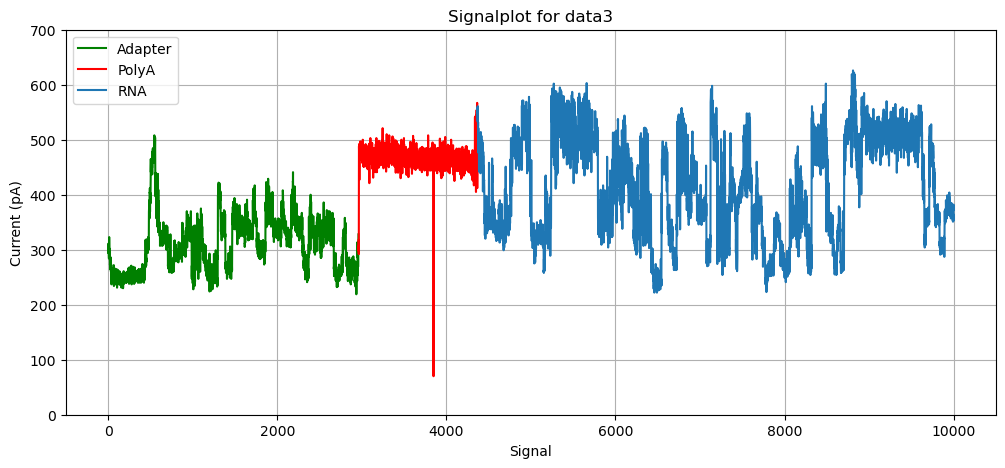

In [58]:
data3 = pd.read_csv("data_2a80ccbe-0be3-4370-bca5-2baf0cc58c03.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data3["signal"] = data3["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data3_subset = data3["signal"][0][:10000]

# ployA start og slut
polya_start_data3 = int(data3["polya_start"][0])
polya_end_data3 = int(data3["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data3_adapter = data3_subset[:polya_start_data3]  # Før polyA-start
data3_polya = data3_subset[polya_start_data3:polya_end_data3]  # PolyA-regionen
data3_rna = data3_subset[polya_end_data3:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data3_adapter)), data3_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data3_adapter), len(data3_adapter) + len(data3_polya)), data3_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data3_adapter) + len(data3_polya), len(data3_subset)), data3_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data3")
plt.legend()
plt.grid()
plt.show()

### 4. af de 10 RNA'er

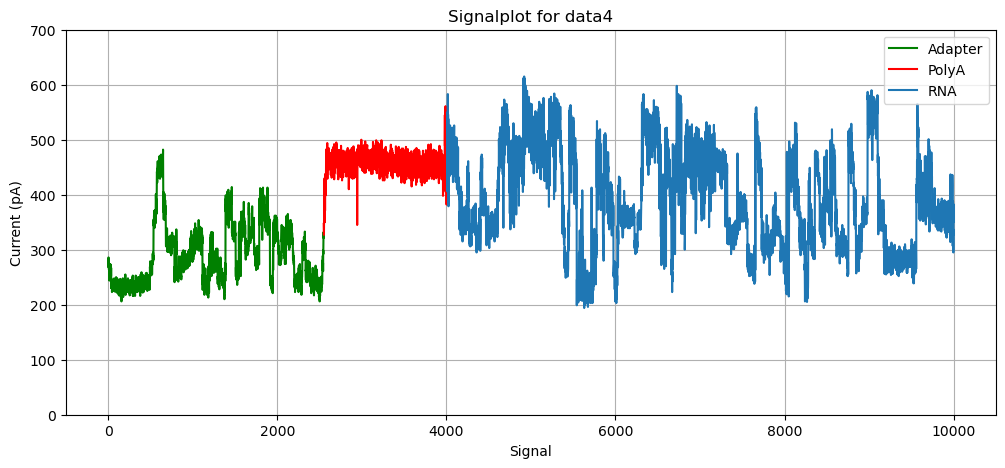

In [59]:
data4 = pd.read_csv("data_3c75d58a-c055-4bea-ab1d-ab1a72300d73.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data4["signal"] = data4["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data4_subset = data4["signal"][0][:10000]

# ployA start og slut
polya_start_data4 = int(data4["polya_start"][0])
polya_end_data4 = int(data4["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data4_adapter = data4_subset[:polya_start_data4]  # Før polyA-start
data4_polya = data4_subset[polya_start_data4:polya_end_data4]  # PolyA-regionen
data4_rna = data4_subset[polya_end_data4:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data4_adapter)), data4_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data4_adapter), len(data4_adapter) + len(data4_polya)), data4_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data4_adapter) + len(data4_polya), len(data4_subset)), data4_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data4")
plt.legend()
plt.grid()
plt.show()

### 5. af de 10 RNA'er

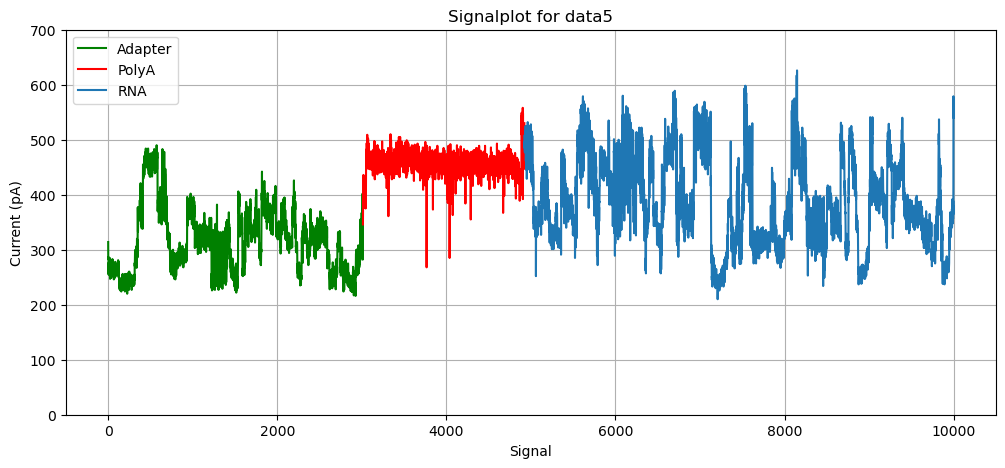

In [60]:
data5 = pd.read_csv("data_4d8fe2c1-4891-43b0-be54-7567b3881a49.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data5["signal"] = data5["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data5_subset = data5["signal"][0][:10000]

# ployA start og slut
polya_start_data5 = int(data5["polya_start"][0])
polya_end_data5 = int(data5["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data5_adapter = data5_subset[:polya_start_data5]  # Før polyA-start
data5_polya = data5_subset[polya_start_data5:polya_end_data5]  # PolyA-regionen
data5_rna = data5_subset[polya_end_data5:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data5_adapter)), data5_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data5_adapter), len(data5_adapter) + len(data5_polya)), data5_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data5_adapter) + len(data5_polya), len(data5_subset)), data5_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data5")
plt.legend()
plt.grid()
plt.show()

### 6. af de 10 RNA'er

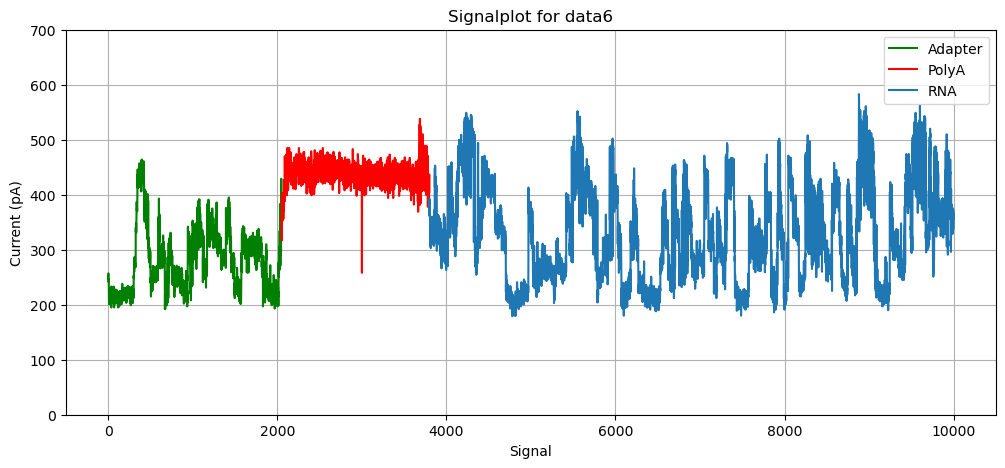

In [61]:
data6 = pd.read_csv("data_12fd2219-ba51-4452-a4b1-ac1628edd1b9.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data6["signal"] = data6["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data6_subset = data6["signal"][0][:10000]

# ployA start og slut
polya_start_data6 = int(data6["polya_start"][0])
polya_end_data6 = int(data6["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data6_adapter = data6_subset[:polya_start_data6]  # Før polyA-start
data6_polya = data6_subset[polya_start_data6:polya_end_data6]  # PolyA-regionen
data6_rna = data6_subset[polya_end_data6:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data6_adapter)), data6_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data6_adapter), len(data6_adapter) + len(data6_polya)), data6_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data6_adapter) + len(data6_polya), len(data6_subset)), data6_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data6")
plt.legend()
plt.grid()
plt.show()

### 7. af de 10 RNA'er

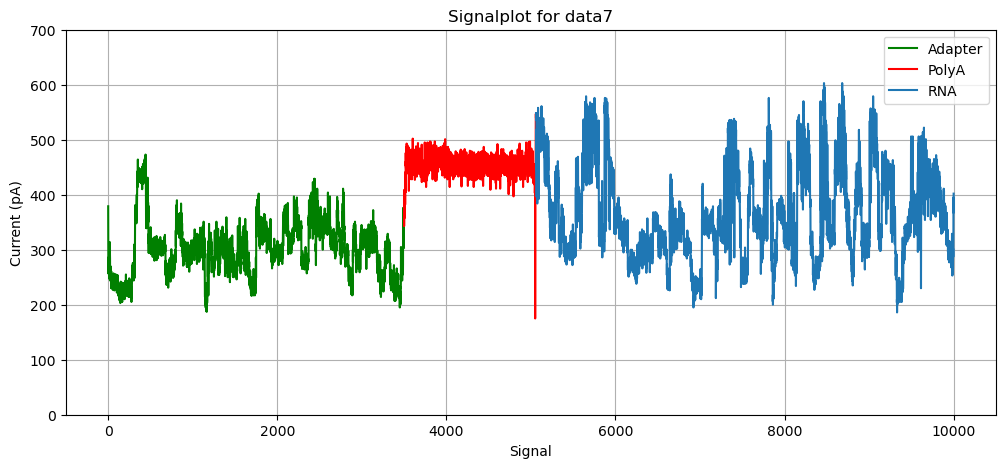

In [62]:
data7 = pd.read_csv("data_24a0bde4-0081-45e7-b487-f3e01b241c3f.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data7["signal"] = data7["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data7_subset = data7["signal"][0][:10000]

# ployA start og slut
polya_start_data7 = int(data7["polya_start"][0])
polya_end_data7 = int(data7["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data7_adapter = data7_subset[:polya_start_data7]  # Før polyA-start
data7_polya = data7_subset[polya_start_data7:polya_end_data7]  # PolyA-regionen
data7_rna = data7_subset[polya_end_data7:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data7_adapter)), data7_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data7_adapter), len(data7_adapter) + len(data7_polya)), data7_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data7_adapter) + len(data7_polya), len(data7_subset)), data7_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data7")
plt.legend()
plt.grid()
plt.show()

### 8. af de 10 RNA'er

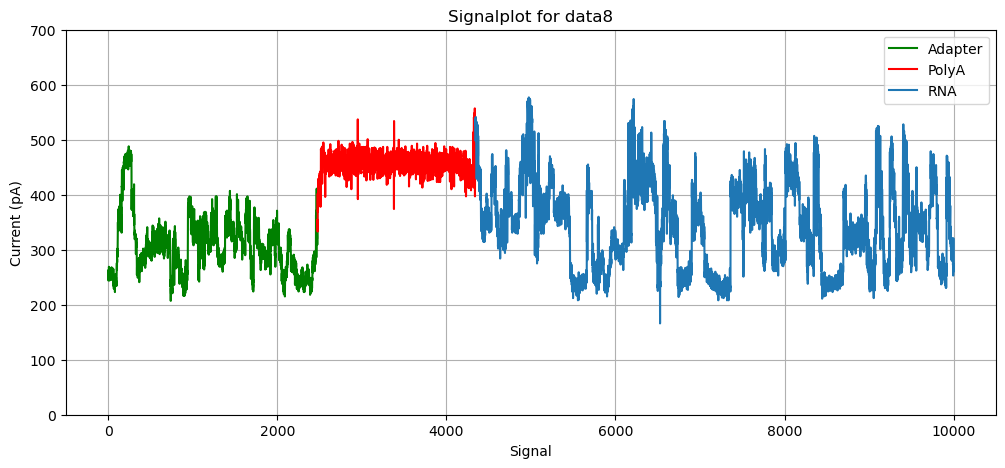

In [63]:
data8 = pd.read_csv("data_31bbd7d2-9273-4b45-829e-1a7604d9023c.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data8["signal"] = data8["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data8_subset = data8["signal"][0][:10000]

# ployA start og slut
polya_start_data8 = int(data8["polya_start"][0])
polya_end_data8 = int(data8["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data8_adapter = data8_subset[:polya_start_data8]  # Før polyA-start
data8_polya = data8_subset[polya_start_data8:polya_end_data8]  # PolyA-regionen
data8_rna = data8_subset[polya_end_data8:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data8_adapter)), data8_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data8_adapter), len(data8_adapter) + len(data8_polya)), data8_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data8_adapter) + len(data8_polya), len(data8_subset)), data8_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data8")
plt.legend()
plt.grid()
plt.show()

### 9. af de 10 RNA'er

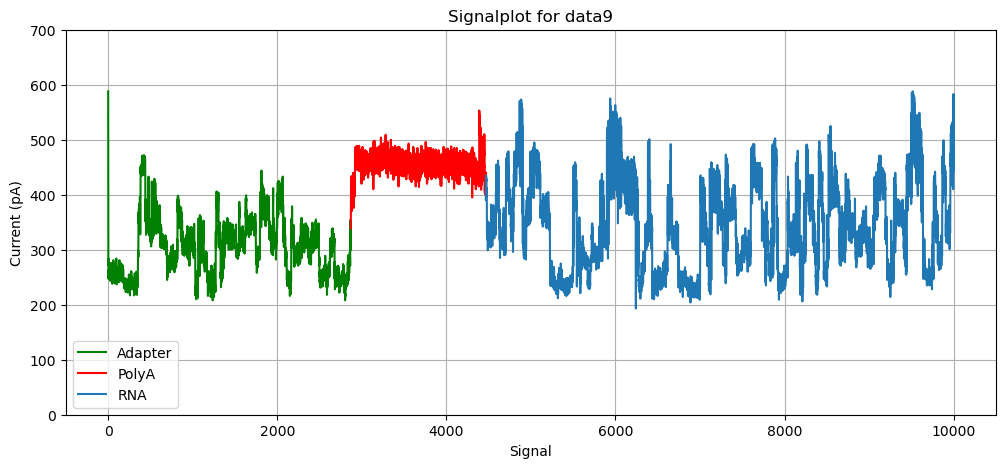

In [64]:
data9 = pd.read_csv("data_056fffb6-1bcf-451e-8fc7-3ad67b5348dd.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data9["signal"] = data9["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data9_subset = data9["signal"][0][:10000]

# ployA start og slut
polya_start_data9 = int(data9["polya_start"][0])
polya_end_data9 = int(data9["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data9_adapter = data9_subset[:polya_start_data9]  # Før polyA-start
data9_polya = data9_subset[polya_start_data9:polya_end_data9]  # PolyA-regionen
data9_rna = data9_subset[polya_end_data9:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data9_adapter)), data9_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data9_adapter), len(data9_adapter) + len(data9_polya)), data9_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data9_adapter) + len(data9_polya), len(data9_subset)), data9_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data9")
plt.legend()
plt.grid()
plt.show()

### 10. af de 10 RNA'er

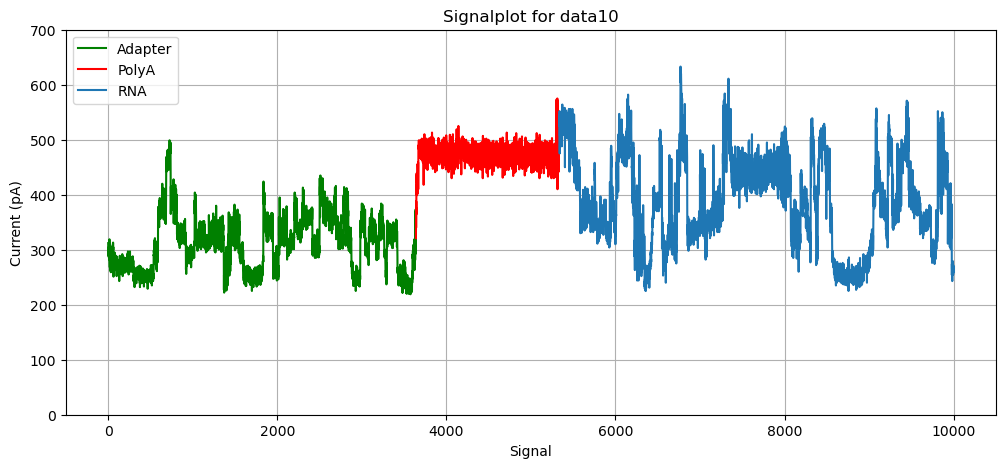

In [65]:
import matplotlib.pyplot as plt

data10 = pd.read_csv("data_63cc9af1-7ca2-4610-a61b-297213dd1554.tsv", sep="\t")

# Konverter "signal" kolonnen til en liste af floats
data10["signal"] = data10["signal"].apply(lambda x: np.array([int(i) for i in x.split(",")]))

# Vælg de første 10.000 målinger fra første række
data10_subset = data10["signal"][0][:10000]

# ployA start og slut
polya_start_data10 = int(data10["polya_start"][0])
polya_end_data10 = int(data10["polya_end"][0])

# Opdeling af signalet i 3 dele: Adapter, ployA og RNA
data10_adapter = data10_subset[:polya_start_data10]  # Før polyA-start
data10_polya = data10_subset[polya_start_data10:polya_end_data10]  # PolyA-regionen
data10_rna = data10_subset[polya_end_data10:]  # Efter polyA-slut

# Plot de første 10.000 målinger
plt.figure(figsize=(12, 5))

# Adapter
plt.plot(range(len(data10_adapter)), data10_adapter, color="green", label="Adapter")

# PolyA-område
plt.plot(range(len(data10_adapter), len(data10_adapter) + len(data10_polya)), data10_polya, color="red", label="PolyA")

# Resten af RNA'et
plt.plot(range(len(data10_adapter) + len(data10_polya), len(data10_subset)), data10_rna, label="RNA")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data10")
plt.legend()
plt.grid()
plt.show()

## Adapter + polyA-hale

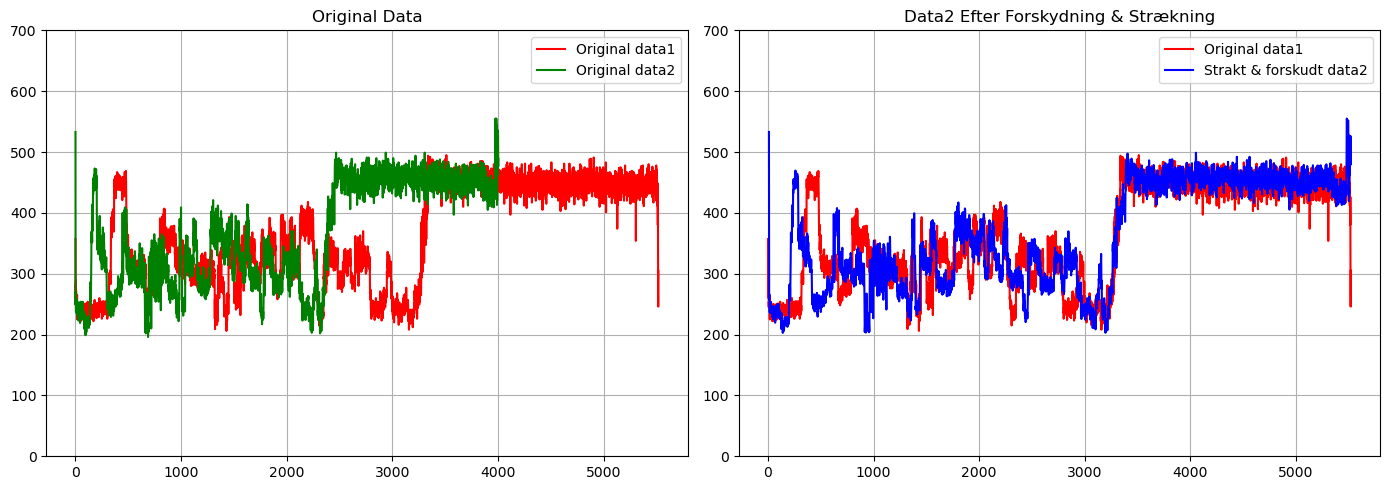

In [66]:
data1_adapter_polya = data1_subset[0: polya_end_data1]
data2_adapter_polya = data2_subset[0: polya_end_data2]

# Strækningen
scale_factor = len(data1_polya) / len(data2_polya)

# Skub signalet til højre
#x_shift = len(data2_adapter_polya) - len(data2_adapter_polya)  
shifted_x = np.arange(len(data2_adapter_polya)) #+ x_shift  

# Skab nye x-akse punkter til interpolation
ny_len_data2 = int(len(data2_adapter_polya) * scale_factor)
x_original_data2 = np.linspace(0, 1, len(data2_adapter_polya))  
x_ny_data2 = np.linspace(0, 1, ny_len_data2)  

# Interpolér dataene til den nye længde
data2_stretched = np.interp(x_ny_data2, x_original_data2, data2_adapter_polya)

# Justér forskydning, så slutpunkterne er ens
slutpunkt_data1 = len(data1_adapter_polya)
slutpunkt_data2 = ny_len_data2 # x_shift + 
x_offset = slutpunkt_data1 - slutpunkt_data2 

# Skab ny x-akse med forskydning, så slutpunktet matcher
shifted_x_stretched = np.linspace(x_offset, slutpunkt_data1, ny_len_data2) # x_shift + 

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Før forskydning
axes[0].plot(range(len(data1_adapter_polya)), data1_adapter_polya, color="red", label="Original data1")
axes[0].plot(range(len(data2_adapter_polya)), data2_adapter_polya, color="green", label="Original data2")
axes[0].set_title("Original Data")
axes[0].set_ylim(0, 700)
axes[0].legend()
axes[0].grid()

# Efter både skubning og strækning
axes[1].plot(range(len(data1_adapter_polya)), data1_adapter_polya, color="red", label="Original data1")
axes[1].plot(shifted_x_stretched, data2_stretched, color="blue", label="Strakt & forskudt data2")
axes[1].set_title("Data2 Efter Forskydning & Strækning")
axes[1].set_ylim(0, 700)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

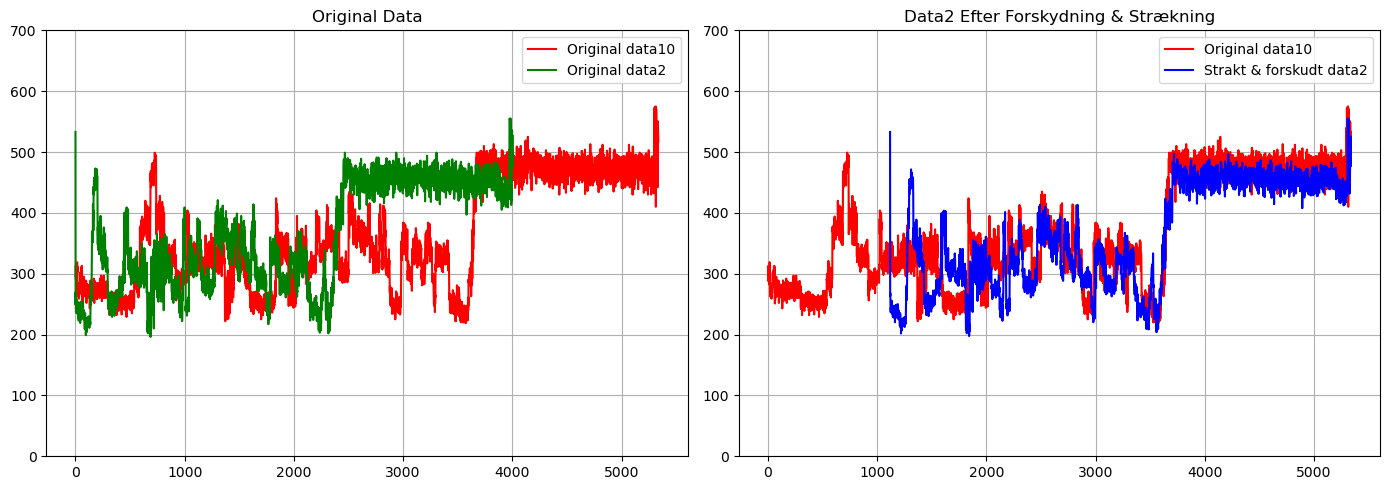

In [67]:
data10_adapter_polya = data10_subset[0: polya_end_data10]
data2_adapter_polya = data2_subset[0: polya_end_data2]

# Strækningen
scale_factor = len(data10_polya) / len(data2_polya)

# Skub signalet til højre
x_shift = len(data2_adapter_polya) - len(data2_adapter_polya)  
shifted_x = np.arange(len(data2_adapter_polya)) + x_shift  

# Skab nye x-akse punkter til interpolation
ny_len_data2 = int(len(data2_adapter_polya) * scale_factor)
x_original_data2 = np.linspace(0, 1, len(data2_adapter_polya))  
x_ny_data2 = np.linspace(0, 1, ny_len_data2)  

# Interpolér dataene til den nye længde
data2_stretched = np.interp(x_ny_data2, x_original_data2, data2_adapter_polya)

# Justér forskydning, så slutpunkterne er ens
slutpunkt_data10 = len(data10_adapter_polya)
slutpunkt_data2 = x_shift + ny_len_data2  
x_offset = slutpunkt_data10 - slutpunkt_data2 

# Skab ny x-akse med forskydning, så slutpunktet matcher
shifted_x_stretched = np.linspace(x_shift + x_offset, slutpunkt_data10, ny_len_data2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Før forskydning
axes[0].plot(range(len(data10_adapter_polya)), data10_adapter_polya, color="red", label="Original data10")
axes[0].plot(range(len(data2_adapter_polya)), data2_adapter_polya, color="green", label="Original data2")
axes[0].set_title("Original Data")
axes[0].set_ylim(0, 700)
axes[0].legend()
axes[0].grid()

# Efter både skubning og strækning
axes[1].plot(range(len(data10_adapter_polya)), data10_adapter_polya, color="red", label="Original data10")
axes[1].plot(shifted_x_stretched, data2_stretched, color="blue", label="Strakt & forskudt data2")
axes[1].set_title("Data2 Efter Forskydning & Strækning")
axes[1].set_ylim(0, 700)
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

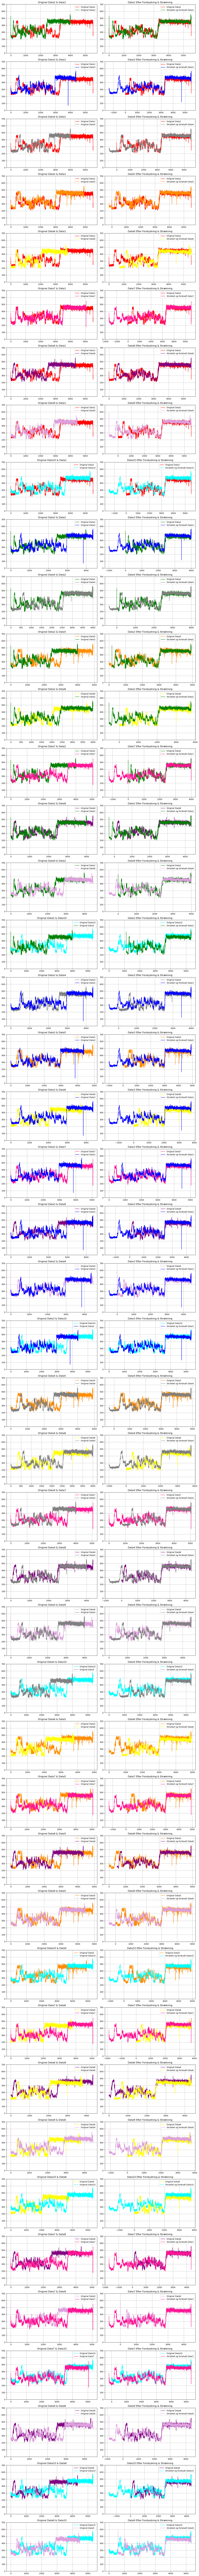

In [68]:
import itertools

data1_adapter_polya = data1_subset[0: polya_end_data1]
data2_adapter_polya = data2_subset[0: polya_end_data2]
data3_adapter_polya = data3_subset[0: polya_end_data3]
data4_adapter_polya = data4_subset[0: polya_end_data4]
data5_adapter_polya = data5_subset[0: polya_end_data5]
data6_adapter_polya = data6_subset[0: polya_end_data6]
data7_adapter_polya = data7_subset[0: polya_end_data7]
data8_adapter_polya = data8_subset[0: polya_end_data8]
data9_adapter_polya = data9_subset[0: polya_end_data9]
data10_adapter_polya = data10_subset[0: polya_end_data10]

# Opret en liste med dine datasæt og farver
data_list = [
    (data1_adapter_polya, "red", "Data1", data1_polya),
    (data2_adapter_polya, "green", "Data2", data2_polya),
    (data3_adapter_polya, "blue", "Data3", data3_polya),
    (data4_adapter_polya, "grey", "Data4", data4_polya),
    (data5_adapter_polya, "darkorange", "Data5", data5_polya),
    (data6_adapter_polya, "yellow", "Data6", data6_polya),
    (data7_adapter_polya, "deeppink", "Data7", data7_polya),
    (data8_adapter_polya, "purple", "Data8", data8_polya),
    (data9_adapter_polya, "plum", "Data9", data9_polya),
    (data10_adapter_polya, "cyan", "Data10", data10_polya)
]

# Find alle kombinationer af subsets
combinations = list(itertools.combinations(data_list, 2))

# Opret subplots med nok rækker til at vise alle par
fig, axes = plt.subplots(len(combinations), 2, figsize=(14, len(combinations) * 4))

# Loop igennem alle kombinationer og stræk data
for idx, ((dataa, colora, labela, polyaa), (datab, colorb, labelb, polyab)) in enumerate(combinations):
    # Strækningen
    long_polya = max(len(polyaa), len(polyab))
    short_polya = min(len(polyaa), len(polyab))

    scale_factor = long_polya / short_polya

    short_data = dataa if len(polyaa) < len(polyab) else datab
    long_data = datab if len(polyaa) < len(polyab) else dataa

    short_label = labela if len(polyaa) < len(polyab) else labelb
    long_label = labelb if len(polyaa) < len(polyab) else labela

    short_color = colora if len(polyaa) < len(polyab) else colorb
    long_color = colorb if len(polyaa) < len(polyab) else colora

    # Skub signalet til højre
    shifted_x = np.arange(len(short_data)) #+ x_shift  

    # Skab nye x-akse punkter til interpolation
    ny_len_short_data = int(len(short_data) * scale_factor)
    x_original_short_data = np.linspace(0, 1, len(short_data))  
    x_ny_short_data = np.linspace(0, 1, ny_len_short_data)  

    # Interpolér dataene til den nye længde (lineær interpolation)
    short_data_stretched = np.interp(x_ny_short_data, x_original_short_data, short_data)

    # Justér forskydning, så slutpunkterne er ens
    slutpunkt_long_data = len(long_data)
    slutpunkt_short_data = ny_len_short_data # x_shift + 
    x_offset = slutpunkt_long_data - slutpunkt_short_data 

    # Skab ny x-akse med forskydning, så slutpunktet matcher
    shifted_x_stretched = np.linspace(x_offset, slutpunkt_long_data, ny_len_short_data) # x_shift + 

    # Før forskydning
    axes[idx, 0].plot(range(len(long_data)), long_data, color=long_color, label=f"Original {long_label}")
    axes[idx, 0].plot(range(len(short_data)), short_data, color=short_color, label=f"Original {short_label}")
    axes[idx, 0].set_title(f"Original {short_label} & {long_label}")
    axes[idx, 0].set_ylim(0, 700)
    axes[idx, 0].legend()
    axes[idx, 0].grid()

    # Efter både skubning og strækning
    axes[idx, 1].plot(range(len(long_data)), long_data, color=long_color, label=f"Original {long_label}")
    axes[idx, 1].plot(shifted_x_stretched, short_data_stretched, color=short_color, label=f"Strukket og forskudt {short_label}")
    axes[idx, 1].set_title(f"{short_label} Efter Forskydning & Strækning")
    axes[idx, 1].set_ylim(0, 700)
    axes[idx, 1].legend()
    axes[idx, 1].grid()

# Justér layout for at undgå overlap
plt.tight_layout()
plt.show()

Data med den længste polyA er data med farven: red


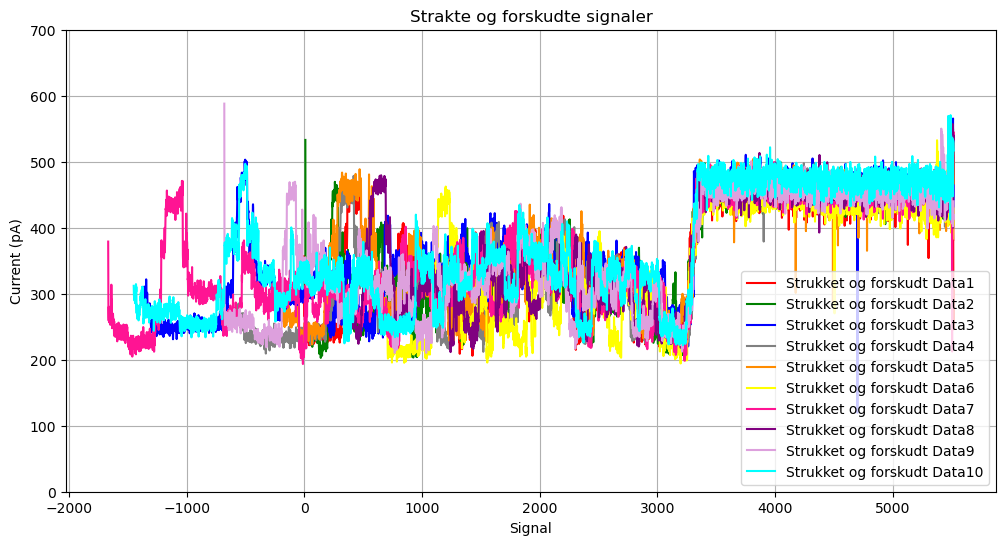

In [69]:
# Startværdier for længste polya
longest_polya = 0
longest_data = None
longest_label = ""
longest_color = ""

# Find det datasæt med den længste polya
for data, color, label, polya in data_list:
    if len(polya) > longest_polya:
        longest_polya = len(polya)
        longest_data = data
        longest_label = label
        longest_color = color

print(f"Data med den længste polyA er data med farven: {longest_color}")

plt.figure(figsize=(12, 6))

# Loop igennem alle datasæt og interpolér de kortere
for data, color, label, polya in data_list:
    # Strækningen
    short_polya = min(longest_polya, len(polya))

    # Beregn skaleringsfaktoren for at matche longest_polya
    scale_factor = longest_polya / short_polya

    short_data = data if short_polya < longest_polya else longest_data
    short_label = label if short_polya < longest_polya else longest_label
    short_color = color if short_polya < longest_polya else longest_color

    # Skub signalet til højre
    shifted_x = np.arange(len(short_data)) 

    # Skab nye x-akse punkter til interpolation
    ny_len_short_data = int(len(short_data) * scale_factor)
    x_original_short_data = np.linspace(0, 1, len(short_data))  
    x_ny_short_data = np.linspace(0, 1, ny_len_short_data)  

    # Interpolér dataene til den nye længde (lineær interpolation)
    short_data_stretched = np.interp(x_ny_short_data, x_original_short_data, short_data)

    # Justér forskydning, så slutpunkterne er ens
    slutpunkt_longest_data = len(longest_data)
    slutpunkt_short_data = ny_len_short_data
    x_offset = slutpunkt_longest_data - slutpunkt_short_data 

    # Skab ny x-akse med forskydning, så slutpunktet matcher
    shifted_x_stretched = np.linspace(x_offset, slutpunkt_longest_data, ny_len_short_data)

    plt.plot(shifted_x_stretched, short_data_stretched, color=short_color, label=f"Strukket og forskudt {short_label}")

# Plotopsætning
plt.title("Strakte og forskudte signaler")
plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.ylim(0, 700)
plt.legend()
plt.grid()

plt.show()

På plottet oven over er alle datasæt strukket og forskudt, så de passer på data1

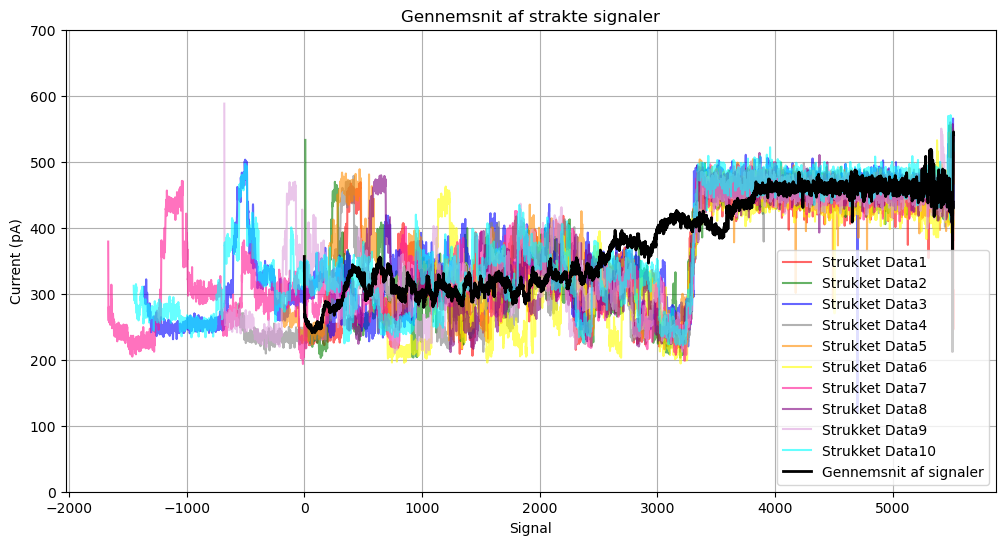

In [70]:
# Startværdier for længste polya
longest_polya = 0
longest_data = None
longest_label = ""
longest_color = ""

# Find det datasæt med den længste polya
for data, color, label, polya in data_list:
    if len(polya) > longest_polya:
        longest_polya = len(polya)
        longest_data = data
        longest_label = label
        longest_color = color

plt.figure(figsize=(12, 6))

# Liste til at lagre de interpolerede signaler
stretched_signals = []

# Loop igennem alle datasæt og interpolér de kortere
for data, color, label, polya in data_list:
    # Beregn skaleringsfaktoren for at matche længden af longest_polya
    scale_factor = longest_polya / len(polya)

    # Skab nye x-akse punkter til interpolation
    new_length = int(len(data) * scale_factor)
    x_original = np.linspace(0, 1, len(data))  
    x_new = np.linspace(0, 1, new_length)  

    # Interpolér dataene til den nye længde (lineær interpolation)
    data_stretched = np.interp(x_new, x_original, data)

    # Gem de strakte signaler
    stretched_signals.append(data_stretched)

    # Skub signalet til højre, så det matcher længden af longest_data
    x_offset = len(longest_data) - len(data_stretched)
    shifted_x_stretched = np.linspace(x_offset, len(longest_data), len(data_stretched))

    # Plot de interpolerede signaler
    plt.plot(shifted_x_stretched, data_stretched, color=color, alpha=0.6, label=f"Strukket {label}")


# Find den maksimale længde blandt de interpolerede signaler
max_length = max(len(sig) for sig in stretched_signals)

# Ensart længder ved padding
stretched_signals = np.array([
    np.pad(sig, (0, max_length - len(sig)), mode='constant', constant_values=np.nan) 
    for sig in stretched_signals
])

# Beregn gennemsnittet (ignorerer NaN-værdier)
average_signal = np.nanmean(stretched_signals, axis=0)

# Opret x-akse for gennemsnittet
x_average = np.linspace(0, len(longest_data), len(average_signal))

# Plot gennemsnittet af alle signaler
plt.plot(x_average, average_signal, color='black', linewidth=2, label="Gennemsnit af signaler")

# Plotopsætning
plt.title("Gennemsnit af strakte signaler")
plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.ylim(0, 700)
plt.legend()
plt.grid()
plt.show()

## PolyA-hale middelværdi

In [71]:
mean_polyA_data1 = np.mean(data1_polya)
#std_polyA_data1 = np.std(data1_polya)

print(f"Middelværdi af polyA-hale data1: {mean_polyA_data1}")
#print(f"Standard afvigelse af polyA-hale data1: {std_polyA_data1}")

Middelværdi af polyA-hale data1: 449.48624267027515


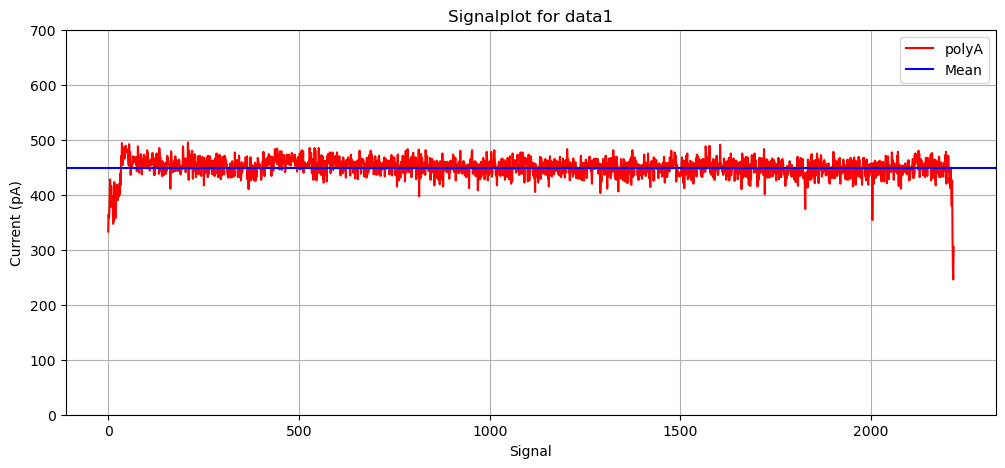

In [72]:
plt.figure(figsize=(12, 5))

plt.plot(range(len(data1_polya)), data1_polya, color="red", label="polyA")

plt.axhline(mean_polyA_data1, color="blue", label="Mean")

plt.ylim(0, 700)

plt.xlabel("Signal")
plt.ylabel("Current (pA)")
plt.title("Signalplot for data1")
plt.legend()
plt.grid()
plt.show()